In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


In [48]:
np.random.seed(0)
noise = 10

In [49]:
def f(x):
    delta = (np.random.rand(x.shape[0]) -0.5) * noise
    return 2.5*x*np.sin(0.7*x) + 2 + delta

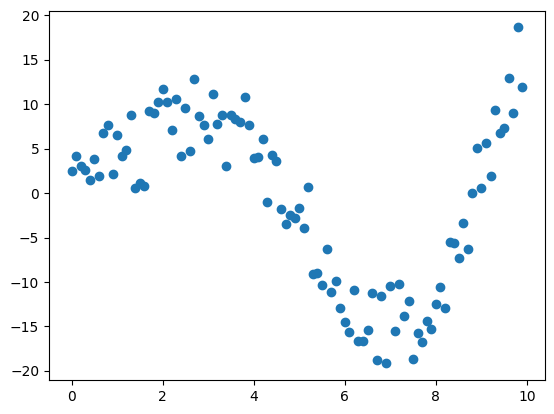

In [50]:
x = np.arange(0,10,0.1)
y = f(x)

plt.scatter(x, y)

In [51]:
def poly3(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d 

In [52]:
weight3, conv3 = opt.curve_fit(poly3, x, y)
weight3, conv3 

(array([ 0.37150418, -5.04668637, 15.71163592, -3.80272249]),
 array([[ 3.69716049e-04, -5.49028327e-03,  2.16324555e-02,
         -1.73968776e-02],
        [-5.49028327e-03,  8.39053125e-02, -3.44750567e-01,
          2.96741022e-01],
        [ 2.16324555e-02, -3.44750567e-01,  1.51429617e+00,
         -1.47637355e+00],
        [-1.73968776e-02,  2.96741022e-01, -1.47637355e+00,
          1.95908420e+00]]))

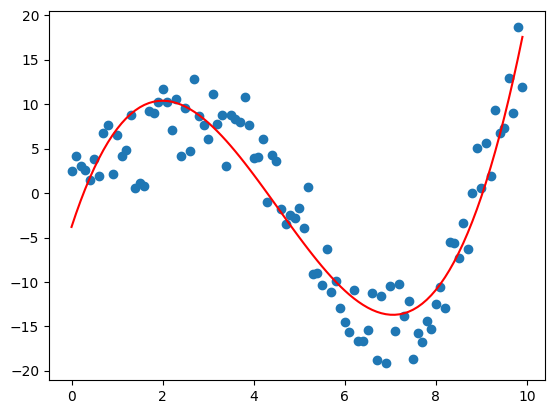

In [53]:
plt.scatter(x, y)
y3 = poly3(x, weight3[0], weight3[1], weight3[2], weight3[3])
plt.plot(x, y3, color="red")

In [57]:
def xsinx(x, a, b, c):
    return a * x * np.sin(b * x) + c

weightsin, convsin = opt.curve_fit(xsinx, x, y, bounds=[(1, -np.inf, 1.9), (4, np.inf, 2.1)])
weightsin, convsin

(array([2.62513983, 0.69665878, 1.95172133]),
 array([[ 7.05341309e-03, -2.18927152e-05,  7.81306902e-03],
        [-2.18927152e-05,  1.02243810e-05, -3.30747257e-04],
        [ 7.81306902e-03, -3.30747257e-04,  1.01023107e-01]]))

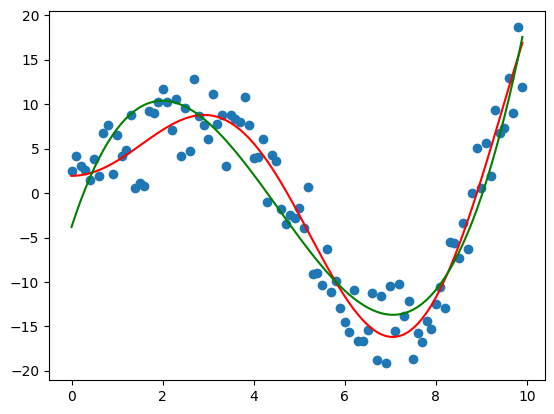

In [55]:
plt.scatter(x, y)
ysin = xsinx(x, weightsin[0], weightsin[1], weightsin[2])
plt.plot(x, ysin, color="red")
y3 = poly3(x, weight3[0], weight3[1], weight3[2], weight3[3])
plt.plot(x, y3, color="green")

In [58]:
import scipy.integrate as integrate

In [60]:
integrate.quad(np.sin, 0, np.pi)

(2.0, 2.220446049250313e-14)

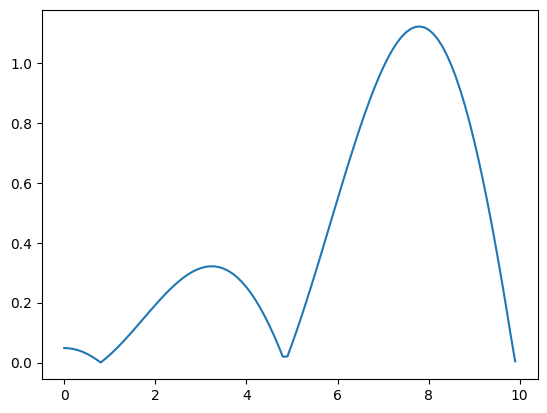

In [65]:
def diff(x):
    return np.abs(weightsin[0] * x * np.sin(weightsin[1] * x) + weightsin[2] - (2.5*x*np.sin(0.7*x) + 2))

ydiff = diff(x)
plt.plot(x, ydiff)

In [66]:
integrate.quad(diff, 0, 8)

(2.984993207847799, 9.80781755093019e-09)